<a href="https://colab.research.google.com/github/makhmudov-khondamir/Machine-Learning/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Polynomial Regression (building a predictive model)**

**Objective**:
We aim to predict the GDP values for future years (2015-2035) using polynomial regression. We will compare polynomial regression with linear regression to demonstrate why polynomial features are necessary for capturing non-linear trends in the data.

**Dataset:**
We will use a dataset that contains the GDP values of China from 1960 to 2014.

Mean Absolute Error: 0.010278879628385007
Mean Squared Error: 0.00023369881676714538
New Data Predictions:
Year: 2015, Polynomial Regression Prediction: 12474379305786.0215
Year: 2016, Polynomial Regression Prediction: 14286624960504.0723
Year: 2017, Polynomial Regression Prediction: 16307227366674.8711
Year: 2018, Polynomial Regression Prediction: 18553435919977.1562
Year: 2019, Polynomial Regression Prediction: 21043213494743.0391
Year: 2020, Polynomial Regression Prediction: 23795605527206.0430
Year: 2021, Polynomial Regression Prediction: 26830494371466.4492
Year: 2022, Polynomial Regression Prediction: 30168761004860.8477
Year: 2023, Polynomial Regression Prediction: 33832270215256.5234
Year: 2024, Polynomial Regression Prediction: 37843865663482.9219
Year: 2025, Polynomial Regression Prediction: 42227442712467.5469
Year: 2026, Polynomial Regression Prediction: 47007963239941.5703
Year: 2027, Polynomial Regression Prediction: 52211432184989.2812
Year: 2028, Polynomial Regression P

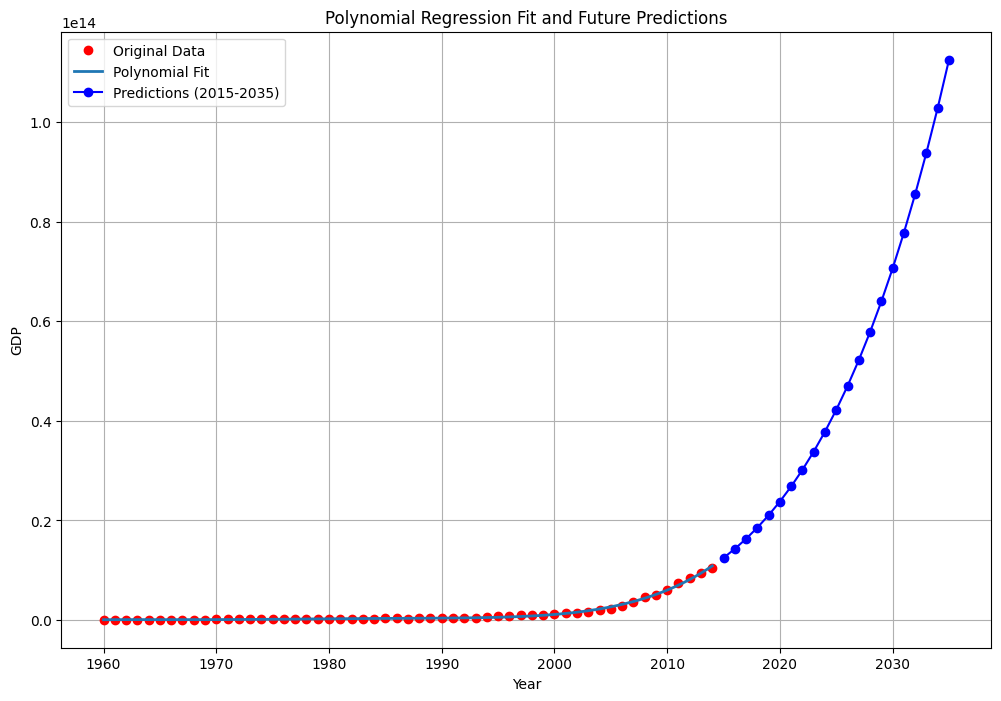

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv")

# Normalize the data
x = df[['Year']].values / df['Year'].max()
y = df['Value'].values / df['Value'].max()

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.2)

# Polynomial feature transformation
degree = 5
poly = PolynomialFeatures(degree=degree, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Train the model
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Predictions on the test set
y_test_pred = model.predict(x_test_poly)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Predictions for new years
new_years = np.arange(2015, 2036).reshape(-1, 1)
new_years_normalized = new_years / df['Year'].max()
new_years_poly = poly.transform(new_years_normalized)
new_years_predictions = model.predict(new_years_poly)

# Denormalize predictions
new_years_predictions_denorm = new_years_predictions * df['Value'].max()

# Print predictions
print("New Data Predictions:")
for year, pred in zip(new_years.flatten(), new_years_predictions_denorm):
    print(f"Year: {year}, Polynomial Regression Prediction: {pred:.4f}")

# Plot the results
plt.figure(figsize=(12, 8))

# Plot the original data
plt.plot(df['Year'], df['Value'], 'ro', label='Original Data')

# Plot polynomial fit line
x_range = np.linspace(df['Year'].min(), df['Year'].max(), 100).reshape(-1, 1)
x_range_normalized = x_range / df['Year'].max()
x_range_poly = poly.transform(x_range_normalized)
y_range = model.predict(x_range_poly) * df['Value'].max()
plt.plot(x_range, y_range, linewidth=2, label='Polynomial Fit')

# Plot predictions for the extended range
plt.plot(new_years, new_years_predictions_denorm, 'bo-', label='Predictions (2015-2035)')

plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.title('Polynomial Regression Fit and Future Predictions')
plt.grid(True)
plt.show()
